In [37]:
import time
import threading
import matplotlib.pyplot as plt
import moviepy.editor as mp

In [18]:
from contextlib import contextmanager
import os
import sys

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

In [13]:
def task(video_path, audio_path):
    clip = mp.VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_path)

In [14]:
def normal(videos, audios):
    for i in range(len(videos)):
        task(videos[i], audios[i])

In [15]:
def threaded(videos, audios, thread_num):
    active=threading.active_count()
    
    for i in range(len(videos)):
        t=threading.Thread(target=task, args=(videos[i], audios[i]))
        t.start()
        
        while True:
            if threading.active_count() -active <thread_num:
                break
            time.sleep(0.1)
        
    while True:
        if threading.active_count()==active:
            break
        time.sleep(0.2)

In [24]:
videos=[r"./Video/30.mp4",r"./Video/Taiwan.mp4", r"./Video/Anime.mp4", r"./Video/Donut.mp4", r"./Video/Timer.mp4"]*5
audios=[r"./Audio/a1.mp3", r"./Audio/a2.mp3", r"./Audio/a3.mp3", r"./Audio/a4.mp3", r"./Audio/a5.mp3"]*5

In [25]:
start_time=time.time()
with suppress_stdout():
    normal(videos, audios)
normal_time=time.time()-start_time

start_time=time.time()
with suppress_stdout():
    threaded(videos, audios, 3)
threaded_time=time.time()-start_time

chunk:   0%|          | 0/665 [00:00<?, ?it/s, now=None]
                                                                 
chunk:   9%|▊         | 57/665 [00:00<00:02, 282.82it/s, now=None]

chunk:  16%|█▌        | 108/665 [00:00<00:01, 374.05it/s, now=None]

chunk:  23%|██▎       | 154/665 [00:00<00:01, 405.91it/s, now=None]

chunk:  31%|███       | 204/665 [00:00<00:01, 436.68it/s, now=None]

chunk:  38%|███▊      | 255/665 [00:00<00:00, 448.63it/s, now=None]

chunk:  46%|████▌     | 306/665 [00:00<00:00, 461.93it/s, now=None]

chunk:  54%|█████▎    | 356/665 [00:00<00:00, 473.58it/s, now=None]

chunk:  61%|██████    | 404/665 [00:00<00:00, 466.27it/s, now=None]

chunk:  68%|██████▊   | 452/665 [00:01<00:00, 469.42it/s, now=None]

chunk:  75%|███████▌  | 500/665 [00:01<00:00, 471.07it/s, now=None]

chunk:  82%|████████▏ | 548/665 [00:01<00:00, 457.03it/s, now=None]

chunk:  89%|████████▉ | 594/665 [00:01<00:00, 451.69it/s, now=None]

                                                  

chunk:  23%|██▎       | 153/665 [00:00<00:01, 376.30it/s, now=None]
                                                                    [A
                                                                
chunk:  38%|███▊      | 250/665 [00:00<00:00, 426.37it/s, now=None]
                                                                
chunk:  69%|██████▉   | 462/665 [00:01<00:00, 484.66it/s, now=None]
                                                                   
chunk:  28%|██▊       | 188/663 [00:00<00:00, 532.16it/s, now=None]

chunk:  37%|███▋      | 243/663 [00:00<00:00, 537.53it/s, now=None]

chunk:  45%|████▍     | 297/663 [00:00<00:00, 506.98it/s, now=None]

chunk:  54%|█████▎    | 355/663 [00:00<00:00, 529.19it/s, now=None]

chunk:  99%|█████████▉| 658/665 [00:01<00:00, 467.70it/s, now=None]
                                                                   

                                                                   

chunk:  58%|█████▊    | 386/663 [00:00<00:00,

In [26]:
print(normal_time)
print(threaded_time)

28.573166847229004
17.73190975189209


In [55]:
x_pts=[i for i in range(1,9)]
y_pts=[]

In [56]:
for i in x_pts:
    start_time=time.time()
    with suppress_stdout():
        threaded(videos, audios, i)
    threaded_time=time.time()-start_time
    y_pts.append(threaded_time)

chunk:  88%|████████▊ | 577/653 [00:00<00:00, 1009.07it/s, now=None][A
                                                                    
                                                                 
chunk:  89%|████████▊ | 589/664 [00:00<00:00, 2480.65it/s, now=None][A
                                                                    
                                                     
chunk:  51%|█████     | 338/665 [00:00<00:00, 869.01it/s, now=None]
                                                                
chunk:  92%|█████████▏| 611/663 [00:00<00:00, 1031.09it/s, now=None][A
                                                                    
                                                     
chunk:  51%|█████▏    | 335/653 [00:00<00:00, 904.81it/s, now=None]
                                                                
chunk:  99%|█████████▉| 657/663 [00:00<00:00, 1005.68it/s, now=None][A
                                                                    


chunk:  95%|█████████▌| 632/663 [00:00<00:00, 855.37it/s, now=None]
                                                                   
                                                     
chunk:  39%|███▉      | 256/653 [00:00<00:00, 662.23it/s, now=None]
                                                                
chunk:  99%|█████████▉| 645/653 [00:00<00:00, 768.91it/s, now=None]
                                                                   
chunk:   0%|          | 0/664 [00:00<?, ?it/s, now=None]
                                                     
chunk:   0%|          | 0/653 [00:00<?, ?it/s, now=None]
                                                                 
chunk:   0%|          | 2/665 [00:00<00:15, 42.09it/s, now=None]

chunk:   0%|          | 3/653 [00:00<00:24, 26.39it/s, now=None]

chunk:  10%|▉         | 65/653 [00:00<00:01, 355.45it/s, now=None]

chunk:  18%|█▊        | 115/653 [00:00<00:01, 418.44it/s, now=None]

chunk:  25%|██▌       | 165/653 [00:00

chunk:  84%|████████▎ | 555/663 [00:01<00:00, 547.31it/s, now=None]

chunk:  92%|█████████▏| 612/663 [00:01<00:00, 552.16it/s, now=None]

chunk:  29%|██▊       | 190/665 [00:00<00:00, 509.43it/s, now=None]
                                                                   ]
chunk:  74%|███████▍  | 493/664 [00:00<00:00, 1162.09it/s, now=None]

chunk:  44%|████▍     | 295/665 [00:00<00:00, 501.17it/s, now=None]]

chunk:  95%|█████████▌| 631/664 [00:00<00:00, 641.33it/s, now=None] 

chunk:  59%|█████▉    | 394/665 [00:00<00:00, 406.88it/s, now=None]
                                                                   

chunk:  63%|██████▎   | 420/665 [00:00<00:00, 406.88it/s, now=None]

chunk:  66%|██████▌   | 439/665 [00:01<00:00, 411.81it/s, now=None]

chunk:  74%|███████▍  | 492/665 [00:01<00:00, 443.72it/s, now=None]

chunk:  34%|███▍      | 224/663 [00:00<00:00, 566.35it/s, now=None]

chunk:  82%|████████▏ | 543/665 [00:01<00:00, 460.01it/s, now=None]

chunk:  97%|█████████▋| 645/665 [

                                                                   

                                                             
                                                                

chunk:  57%|█████▋    | 379/665 [00:00<00:00, 483.70it/s, now=None]

chunk:  66%|██████▌   | 438/665 [00:00<00:00, 513.82it/s, now=None]

                                                                   
                                                                
chunk:  54%|█████▍    | 357/663 [00:00<00:00, 720.46it/s, now=None]
                                                                   
chunk:  37%|███▋      | 240/653 [00:00<00:00, 562.88it/s, now=None]

chunk:  44%|████▎     | 285/653 [00:00<00:00, 551.63it/s, now=None]

chunk:  53%|█████▎    | 343/653 [00:00<00:00, 560.55it/s, now=None]

chunk:  61%|██████▏   | 400/653 [00:00<00:00, 554.54it/s, now=None]

chunk:  97%|█████████▋| 641/663 [00:00<00:00, 654.96it/s, now=None]
                                                    

chunk:   0%|          | 0/653 [00:00<?, ?it/s, now=None]
                                                                 
chunk:   0%|          | 2/665 [00:00<00:22, 29.41it/s, now=None]
                                                                
chunk:   0%|          | 2/665 [00:00<00:28, 23.44it/s, now=None]

chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None]


chunk:   0%|          | 3/653 [00:00<00:22, 29.45it/s, now=None]

chunk:   1%|▏         | 9/663 [00:00<00:07, 89.13it/s, now=None]


chunk:   9%|▉         | 60/653 [00:00<00:01, 344.59it/s, now=None]

chunk:   6%|▌         | 41/663 [00:00<00:02, 223.99it/s, now=None]


chunk:  17%|█▋        | 109/653 [00:00<00:01, 407.67it/s, now=None]

chunk:  14%|█▎        | 90/663 [00:00<00:01, 344.50it/s, now=None]


chunk:  23%|██▎       | 151/653 [00:00<00:01, 411.32it/s, now=None]

chunk:  19%|█▉        | 128/663 [00:00<00:01, 356.88it/s, now=None]


chunk:  30%|██▉       | 193/653 [00:00<00:01, 407.70it/s, now=None]

chunk:

chunk:  78%|███████▊  | 517/665 [00:01<00:00, 366.47it/s, now=None]

chunk:  80%|███████▉  | 530/664 [00:01<00:00, 407.30it/s, now=None]


chunk:  84%|████████▍ | 561/665 [00:01<00:00, 383.64it/s, now=None]

chunk:  88%|████████▊ | 586/664 [00:01<00:00, 449.90it/s, now=None]


chunk:  92%|█████████▏| 610/665 [00:01<00:00, 412.34it/s, now=None]

chunk:  95%|█████████▌| 633/664 [00:01<00:00, 454.13it/s, now=None]


chunk:  98%|█████████▊| 653/665 [00:01<00:00, 417.09it/s, now=None]
                                                                   


                                                                   

chunk:  43%|████▎     | 279/653 [00:00<00:00, 519.97it/s, now=None]
                                                                   
chunk:   6%|▋         | 42/663 [00:00<00:02, 218.28it/s, now=None]

chunk:   0%|          | 0/665 [00:00<?, ?it/s, now=None]

                                                  
                                                               

                                                          

                                                             
                                                                


chunk:  38%|███▊      | 249/664 [00:00<00:00, 446.09it/s, now=None]

chunk:  59%|█████▉    | 391/663 [00:00<00:00, 438.22it/s, now=None]


chunk:  38%|███▊      | 252/664 [00:00<00:00, 453.53it/s, now=None]

chunk:  66%|██████▌   | 435/663 [00:01<00:00, 432.39it/s, now=None]


chunk:  50%|████▉     | 331/664 [00:00<00:00, 561.36it/s, now=None]

chunk:  74%|███████▍  | 491/663 [00:01<00:00, 468.93it/s, now=None]


chunk:  62%|██████▏   | 409/664 [00:00<00:00, 629.77it/s, now=None]

chunk:  81%|████████▏ | 540/663 [00:01<00:00, 472.82it/s, now=None]


chunk:  74%|███████▎  | 489/664 [00:00<00:00, 681.51it/s, now=None]

chunk:  89%|████████▉ | 591/663 [00:01<00:00, 483.62it/s, now=None]


chunk:  84%|████████▍ | 559/664 [00:01<00:00, 685.14it/s, now=None]

chunk:  97%|█████████▋| 646/663 [00:01<00:00, 5

chunk:   4%|▍         | 29/665 [00:00<00:04, 132.51it/s, now=None]A


chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None]



chunk:   1%|          | 5/663 [00:00<00:34, 19.21it/s, now=None]

chunk:   4%|▍         | 29/663 [00:00<00:05, 106.14it/s, now=None]


chunk:   4%|▍         | 29/663 [00:00<00:02, 284.12it/s, now=None]



chunk:   2%|▏         | 11/664 [00:00<00:05, 109.73it/s, now=None]

chunk:  10%|█         | 69/663 [00:00<00:02, 211.70it/s, now=None]


chunk:  10%|█         | 68/663 [00:00<00:01, 338.81it/s, now=None]



chunk:   7%|▋         | 44/664 [00:00<00:02, 236.98it/s, now=None]

chunk:  15%|█▌        | 102/663 [00:00<00:02, 251.17it/s, now=None]



chunk:  13%|█▎        | 89/664 [00:00<00:01, 333.44it/s, now=None]

chunk:  15%|█▌        | 101/653 [00:00<00:02, 249.45it/s, now=None]


chunk:  22%|██▏       | 143/663 [00:00<00:01, 301.44it/s, now=None]



chunk:  19%|█▉        | 127/664 [00:00<00:01, 347.38it/s, now=None]

chunk:  20%|██        | 133/653 [00:00<00

chunk:  38%|███▊      | 255/665 [00:00<00:00, 446.55it/s, now=None][A
                                                                   

                                                            
chunk:  40%|███▉      | 263/665 [00:00<00:00, 446.55it/s, now=None]

chunk:  19%|█▉        | 124/653 [00:00<00:01, 324.32it/s, now=None]


chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None]

chunk:  13%|█▎        | 87/663 [00:00<00:01, 317.62it/s, now=None]


                                               
                                                                   

                                                            


chunk:  45%|████▌     | 300/665 [00:00<00:00, 423.02it/s, now=None]

chunk:  24%|██▍       | 159/653 [00:00<00:01, 301.26it/s, now=None]

chunk:  20%|██        | 134/663 [00:00<00:01, 374.88it/s, now=None]



chunk:   0%|          | 0/664 [00:00<?, ?it/s, now=None]


chunk:  52%|█████▏    | 343/665 [00:00<00:00, 394.04it/s, now=None]

chunk:  31%|███  

chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None]


chunk:  40%|████      | 266/665 [00:00<00:00, 450.14it/s, now=None][A


chunk:   0%|          | 3/653 [00:00<00:32, 20.23it/s, now=None]

chunk:  47%|████▋     | 312/665 [00:00<00:00, 442.46it/s, now=None]


chunk:   5%|▍         | 32/653 [00:00<00:04, 152.13it/s, now=None]

chunk:  54%|█████▎    | 357/665 [00:00<00:00, 424.29it/s, now=None]

chunk:  13%|█▎        | 87/663 [00:00<00:01, 295.68it/s, now=None]


chunk:  60%|██████    | 400/665 [00:00<00:00, 414.32it/s, now=None]

chunk:  20%|█▉        | 131/663 [00:00<00:01, 345.47it/s, now=None]


chunk:  41%|████      | 273/663 [00:00<00:01, 384.32it/s, now=None]

chunk:  27%|██▋       | 181/663 [00:00<00:01, 394.86it/s, now=None]


chunk:  47%|████▋     | 313/663 [00:00<00:00, 378.15it/s, now=None]

chunk:  34%|███▎      | 223/663 [00:00<00:01, 398.74it/s, now=None]


chunk:  53%|█████▎    | 352/663 [00:01<00:00, 358.09it/s, now=None]

chunk:  40%|████      | 266/663 [00:00<00

chunk:  52%|█████▏    | 345/665 [00:00<00:00, 482.47it/s, now=None][A


chunk:   0%|          | 3/663 [00:00<00:34, 18.87it/s, now=None]

chunk:  59%|█████▉    | 395/665 [00:00<00:00, 485.49it/s, now=None]

chunk:  26%|██▋       | 172/653 [00:00<00:01, 386.93it/s, now=None]


chunk:  67%|██████▋   | 445/665 [00:00<00:00, 467.24it/s, now=None][A

chunk:  19%|█▉        | 127/663 [00:00<00:01, 317.76it/s, now=None]


chunk:  74%|███████▍  | 493/665 [00:01<00:00, 441.41it/s, now=None]

chunk:  25%|██▌       | 166/663 [00:00<00:01, 338.97it/s, now=None]


chunk:  81%|████████  | 538/665 [00:01<00:00, 426.14it/s, now=None]

chunk:  32%|███▏      | 210/663 [00:00<00:01, 370.15it/s, now=None]


chunk:  88%|████████▊ | 582/665 [00:01<00:00, 410.85it/s, now=None]

chunk:  38%|███▊      | 255/663 [00:00<00:01, 393.10it/s, now=None]


chunk:  24%|██▎       | 157/663 [00:00<00:01, 265.51it/s, now=None]


                                                          

                                   

chunk:  91%|█████████ | 606/665 [00:01<00:00, 466.99it/s, now=None][A

chunk:   0%|          | 0/653 [00:00<?, ?it/s, now=None]
                                                                   

                                                  
                                                                

chunk:  25%|██▌       | 169/663 [00:00<00:01, 352.34it/s, now=None]

chunk:   0%|          | 3/653 [00:00<00:42, 15.21it/s, now=None]

                                                          
                                                                

chunk:  35%|███▍      | 231/663 [00:00<00:01, 430.95it/s, now=None]

                                                           
                                                                

chunk:  35%|███▍      | 231/663 [00:00<00:01, 430.95it/s, now=None]

chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None] now=None]


chunk:  42%|████▏     | 276/663 [00:00<00:00, 397.21it/s, now=None]

chunk:   0%|          | 

chunk:  23%|██▎       | 153/665 [00:00<00:02, 206.82it/s, now=None]


chunk:  22%|██▏       | 147/664 [00:00<00:02, 211.62it/s, now=None]

chunk:  31%|███       | 200/653 [00:00<00:01, 280.37it/s, now=None]



chunk:  29%|██▉       | 193/663 [00:00<00:01, 305.40it/s, now=None]




chunk:  27%|██▋       | 180/665 [00:00<00:02, 223.74it/s, now=None]

chunk:  35%|███▌      | 230/653 [00:00<00:01, 284.83it/s, now=None]



chunk:  34%|███▍      | 224/663 [00:00<00:01, 305.08it/s, now=None]


chunk:  29%|██▉       | 192/665 [00:01<00:02, 216.83it/s, now=None]




chunk:  31%|███       | 204/665 [00:01<00:02, 217.81it/s, now=None]

chunk:  40%|███▉      | 259/653 [00:01<00:01, 277.33it/s, now=None]


chunk:  28%|██▊       | 189/664 [00:00<00:02, 193.13it/s, now=None]



chunk:  38%|███▊      | 255/663 [00:00<00:01, 293.43it/s, now=None]




chunk:  34%|███▍      | 227/665 [00:01<00:01, 220.16it/s, now=None]

chunk:  45%|████▌     | 294/653 [00:01<00:01, 296.43it/s, now=None]



chunk:  44%|██

chunk: 100%|█████████▉| 663/665 [00:03<00:00, 274.42it/s, now=None]


                                                                   
chunk:  96%|█████████▌| 637/665 [00:03<00:00, 263.96it/s, now=None]




chunk:  96%|█████████▌| 636/663 [00:02<00:00, 333.09it/s, now=None]




                                                    


                                                          
                                                                




chunk:  99%|█████████▉| 658/665 [00:03<00:00, 263.96it/s, now=None]



chunk: 100%|██████████| 665/665 [00:03<00:00, 267.94it/s, now=None]
                                                                   




chunk:  16%|█▌        | 102/653 [00:00<00:01, 358.13it/s, now=None]
                                                                   
chunk:  39%|███▉      | 258/663 [00:00<00:00, 496.22it/s, now=None]

chunk:  31%|███       | 201/653 [00:00<00:01, 441.81it/s, now=None]

chunk:  38%|███▊      | 247/653 [00:00<00:01, 402.

chunk:  83%|████████▎ | 544/653 [00:02<00:00, 167.60it/s, now=None]



chunk:  38%|███▊      | 253/663 [00:01<00:02, 182.95it/s, now=None]

chunk:  78%|███████▊  | 517/663 [00:01<00:00, 315.93it/s, now=None]


chunk:  44%|████▍     | 293/665 [00:01<00:01, 191.64it/s, now=None]




                                                    



                                                       

                                                             
                                                                


                                                          




chunk:  77%|███████▋  | 508/664 [00:01<00:00, 400.28it/s, now=None]



chunk:  41%|████      | 273/663 [00:01<00:02, 184.99it/s, now=None]

chunk:  86%|████████▌ | 562/653 [00:02<00:00, 167.60it/s, now=None]


chunk:  46%|████▌     | 305/665 [00:01<00:01, 191.64it/s, now=None]




chunk:  77%|███████▋  | 508/664 [00:01<00:00, 400.28it/s, now=None]



chunk:  41%|████      | 273/663 [00:01<00:02, 184.99it/s, no

chunk:  52%|█████▏    | 349/665 [00:01<00:00, 397.38it/s, now=None]

                                                             
                                                                   

chunk:  74%|███████▍  | 493/664 [00:00<00:00, 668.23it/s, now=None]


chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None]



chunk:  62%|██████▏   | 411/663 [00:01<00:00, 352.90it/s, now=None]

chunk:  59%|█████▊    | 390/665 [00:01<00:00, 339.74it/s, now=None]


chunk:  68%|██████▊   | 448/663 [00:01<00:00, 355.99it/s, now=None]



chunk:   0%|          | 3/653 [00:00<00:34, 18.70it/s, now=None]

chunk:  64%|██████▍   | 426/665 [00:01<00:00, 325.60it/s, now=None]


chunk:  73%|███████▎  | 485/663 [00:01<00:00, 344.36it/s, now=None]



chunk:   4%|▍         | 29/653 [00:00<00:04, 125.60it/s, now=None]



                                                      


                                                         

                                                             
     

chunk:  78%|███████▊  | 515/663 [00:01<00:00, 387.03it/s, now=None]



chunk:  67%|██████▋   | 437/653 [00:02<00:00, 317.80it/s, now=None]


chunk:  75%|███████▍  | 496/663 [00:02<00:00, 361.10it/s, now=None]




                                                    



                                                       


                                                          




chunk:  85%|████████▍ | 561/663 [00:01<00:00, 378.85it/s, now=None]



chunk:  73%|███████▎  | 477/653 [00:02<00:00, 338.62it/s, now=None]


chunk:  76%|███████▌  | 503/663 [00:02<00:00, 361.10it/s, now=None]



chunk:  73%|███████▎  | 477/653 [00:02<00:00, 338.62it/s, now=None]




chunk:   0%|          | 0/664 [00:00<?, ?it/s, now=None], now=None]




chunk:  90%|█████████ | 600/663 [00:01<00:00, 377.83it/s, now=None]


chunk:  80%|████████  | 533/663 [00:02<00:00, 322.70it/s, now=None]



chunk:  78%|███████▊  | 512/653 [00:02<00:00, 305.73it/s, now=None]




chunk:  97%|█████████▋| 643/663 [00:01<00

chunk:  33%|███▎      | 215/653 [00:00<00:01, 301.75it/s, now=None]

chunk:  87%|████████▋ | 576/663 [00:01<00:00, 320.49it/s, now=None]



chunk:  20%|█▉        | 130/664 [00:00<00:02, 245.45it/s, now=None]


chunk:  39%|███▉      | 255/653 [00:01<00:01, 321.16it/s, now=None]

chunk:  92%|█████████▏| 612/663 [00:01<00:00, 328.39it/s, now=None]



chunk:  25%|██▌       | 169/664 [00:00<00:01, 290.68it/s, now=None]


chunk:  46%|████▌     | 300/653 [00:01<00:00, 358.83it/s, now=None]

chunk:  99%|█████████▉| 658/663 [00:01<00:00, 362.13it/s, now=None]



chunk:  30%|██▉       | 199/664 [00:00<00:01, 288.67it/s, now=None]

                                                                   



                                                       


                                                                   



chunk:  31%|███       | 203/664 [00:00<00:01, 288.67it/s, now=None]


chunk:  50%|████▉     | 324/653 [00:01<00:00, 358.83it/s, now=None]


chunk:  52%|█████▏    | 337/653

chunk:  11%|█▏        | 76/665 [00:00<00:07, 75.89it/s, now=None]

chunk:  33%|███▎      | 220/663 [00:01<00:02, 196.86it/s, now=None]




chunk:  28%|██▊       | 186/653 [00:01<00:02, 184.04it/s, now=None]


chunk:  23%|██▎       | 152/663 [00:01<00:04, 102.45it/s, now=None]





chunk:  11%|█         | 74/664 [00:00<00:06, 96.81it/s, now=None] 



chunk:  13%|█▎        | 86/665 [00:00<00:07, 79.91it/s, now=None]

chunk:  37%|███▋      | 242/663 [00:01<00:02, 201.05it/s, now=None]




chunk:  31%|███       | 204/665 [00:01<00:02, 178.53it/s, now=None]





chunk:  13%|█▎        | 85/664 [00:01<00:06, 93.32it/s, now=None]



chunk:  14%|█▍        | 95/665 [00:01<00:07, 77.10it/s, now=None]


chunk:  25%|██▍       | 164/663 [00:01<00:05, 95.10it/s, now=None] 

chunk:  40%|███▉      | 263/663 [00:01<00:02, 185.21it/s, now=None]




chunk:  34%|███▍      | 228/665 [00:01<00:02, 194.73it/s, now=None]





chunk:  15%|█▌        | 100/664 [00:01<00:05, 107.99it/s, now=None]


chunk:  27%|██▋

chunk:  86%|████████▌ | 568/663 [00:02<00:00, 227.89it/s, now=None]





chunk:  40%|████      | 268/664 [00:02<00:04, 83.77it/s, now=None] 



chunk:  87%|████████▋ | 580/665 [00:03<00:00, 201.81it/s, now=None]


chunk:  52%|█████▏    | 346/663 [00:03<00:03, 90.33it/s, now=None]





chunk:  42%|████▏     | 279/664 [00:02<00:04, 88.89it/s, now=None]

chunk:  94%|█████████▍| 625/663 [00:03<00:00, 203.46it/s, now=None]



chunk:  39%|███▉      | 260/665 [00:03<00:04, 82.01it/s, now=None]




chunk:  94%|█████████▍| 615/653 [00:03<00:00, 199.33it/s, now=None]

chunk:  98%|█████████▊| 647/663 [00:03<00:00, 207.21it/s, now=None]



chunk:  41%|████      | 272/665 [00:03<00:04, 90.65it/s, now=None]





chunk:  93%|█████████▎| 621/665 [00:03<00:00, 193.91it/s, now=None]


chunk:  54%|█████▍    | 357/663 [00:03<00:03, 82.48it/s, now=None]




chunk:  98%|█████████▊| 637/653 [00:03<00:00, 194.74it/s, now=None]



chunk:  43%|████▎     | 284/665 [00:03<00:03, 97.34it/s, now=None]

            

chunk:   0%|          | 3/663 [00:00<00:44, 14.89it/s, now=None]

chunk:   4%|▍         | 29/663 [00:00<00:06, 91.77it/s, now=None]

chunk:   4%|▍         | 29/665 [00:00<00:07, 87.04it/s, now=None]


chunk:  25%|██▍       | 162/653 [00:00<00:01, 299.54it/s, now=None][A

chunk:  11%|█         | 74/665 [00:00<00:02, 197.59it/s, now=None]


chunk:  16%|█▋        | 109/663 [00:00<00:02, 244.38it/s, now=None]

                                                            


                                                         
                                                                   

chunk:  12%|█▏        | 81/665 [00:00<00:02, 197.59it/s, now=None]


chunk:  30%|██▉       | 195/653 [00:00<00:01, 262.04it/s, now=None]


chunk:   7%|▋         | 49/664 [00:00<00:04, 125.75it/s, now=None]



chunk:  21%|██        | 138/663 [00:00<00:02, 244.49it/s, now=None]

chunk:  34%|███▍      | 224/653 [00:00<00:01, 266.65it/s, now=None]


chunk:  27%|██▋       | 179/663 [00:00<00:01, 291.63

chunk:  44%|████▍     | 291/665 [00:02<00:04, 78.84it/s, now=None]




chunk:  45%|████▌     | 297/653 [00:01<00:01, 240.60it/s, now=None]



chunk:  69%|██████▉   | 451/653 [00:02<00:02, 87.41it/s, now=None]]





chunk:  98%|█████████▊| 650/663 [00:02<00:00, 260.91it/s, now=None]


chunk:  43%|████▎     | 284/664 [00:02<00:03, 97.84it/s, now=None] 

chunk:  45%|████▌     | 301/665 [00:02<00:04, 77.53it/s, now=None]




chunk:  49%|████▉     | 322/653 [00:01<00:01, 235.54it/s, now=None]



chunk:  38%|███▊      | 255/663 [00:01<00:02, 155.47it/s, now=None]
                                                                   



                                                       

                                                            





                                                 


                                                         




                                                                   



chunk:  39%|███▉      | 259/663 [00:02<00:02, 155.47it/s,

chunk:   5%|▍         | 31/664 [00:00<00:02, 219.75it/s, now=None]

chunk:  78%|███████▊  | 518/665 [00:04<00:01, 127.66it/s, now=None]



chunk:  64%|██████▍   | 425/663 [00:03<00:02, 93.43it/s, now=None]





chunk:  46%|████▌     | 305/663 [00:02<00:03, 102.63it/s, now=None]


chunk:   7%|▋         | 44/664 [00:00<00:03, 183.68it/s, now=None]





chunk:  48%|████▊     | 317/663 [00:03<00:03, 106.08it/s, now=None]



chunk:  18%|█▊        | 119/664 [00:00<00:01, 413.69it/s, now=None]

chunk:  80%|████████  | 532/665 [00:04<00:01, 106.47it/s, now=None]


chunk:  88%|████████▊ | 583/664 [00:04<00:00, 118.95it/s, now=None]





chunk:  50%|████▉     | 330/663 [00:03<00:02, 112.73it/s, now=None]



chunk:  68%|██████▊   | 449/663 [00:03<00:02, 94.11it/s, now=None]

chunk:  25%|██▍       | 163/664 [00:00<00:01, 383.60it/s, now=None]


chunk:  91%|█████████ | 602/664 [00:04<00:00, 132.62it/s, now=None]





chunk:  52%|█████▏    | 343/663 [00:03<00:02, 110.60it/s, now=None]

chunk:  87%|█

chunk:  34%|███▎      | 224/665 [00:01<00:01, 301.65it/s, now=None][A

chunk:  40%|████      | 266/665 [00:01<00:01, 336.37it/s, now=None]

chunk:  47%|████▋     | 311/665 [00:01<00:00, 369.33it/s, now=None]

chunk:  54%|█████▎    | 357/665 [00:01<00:00, 387.69it/s, now=None]

chunk:  45%|████▌     | 301/663 [00:00<00:00, 472.14it/s, now=None]

                                                                   

chunk:   0%|          | 0/653 [00:00<?, ?it/s, now=None]

chunk:  69%|██████▉   | 458/665 [00:01<00:00, 426.69it/s, now=None]

chunk:   0%|          | 3/653 [00:00<00:52, 12.48it/s, now=None]

chunk:  83%|████████▎ | 550/665 [00:01<00:00, 430.42it/s, now=None]

chunk:  89%|████████▉ | 594/665 [00:01<00:00, 428.82it/s, now=None]

chunk:  96%|█████████▌| 638/665 [00:02<00:00, 409.72it/s, now=None]A

                                                             
                                                                   

chunk:  12%|█▏        | 80/653 [00:00<00:03, 184.15i

chunk:   0%|          | 2/653 [00:00<00:45, 14.28it/s, now=None]

chunk: 100%|█████████▉| 662/664 [00:01<00:00, 336.71it/s, now=None]



chunk:  41%|████      | 273/663 [00:01<00:01, 291.05it/s, now=None]

chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None]           


chunk:   0%|          | 3/653 [00:00<00:45, 14.19it/s, now=None]



chunk:  46%|████▌     | 304/663 [00:01<00:01, 279.91it/s, now=None]



                                                       


                                                          
                                                             

                                                                   



chunk:  46%|████▋     | 307/663 [00:01<00:01, 279.91it/s, now=None]


chunk:   4%|▍         | 26/653 [00:00<00:44, 14.19it/s, now=None]

chunk:   0%|          | 2/663 [00:00<00:39, 16.53it/s, now=None]ne]

chunk:  30%|██▉       | 197/665 [00:01<00:03, 153.63it/s, now=None]



chunk:  50%|█████     | 334/663 [00:01<00:01, 262.89it/s,

chunk:  85%|████████▍ | 562/665 [00:03<00:00, 242.26it/s, now=None]




chunk:  56%|█████▌    | 372/663 [00:02<00:01, 269.26it/s, now=None]

chunk:  90%|█████████ | 601/665 [00:03<00:00, 284.21it/s, now=None]




chunk:  62%|██████▏   | 408/663 [00:02<00:00, 283.06it/s, now=None]

chunk:  95%|█████████▍| 630/665 [00:03<00:00, 281.20it/s, now=None]




                                                    

                                                                   




chunk:  45%|████▍     | 296/664 [00:01<00:01, 336.29it/s, now=None]

chunk:  63%|██████▎   | 416/663 [00:02<00:00, 283.06it/s, now=None]




chunk:  66%|██████▌   | 438/663 [00:02<00:00, 287.43it/s, now=None]

chunk: 100%|█████████▉| 663/665 [00:03<00:00, 291.30it/s, now=None]

                                                                   




chunk:  52%|█████▏    | 342/664 [00:01<00:00, 370.93it/s, now=None]




                                                                   




chunk:  71%|███████   | 4

chunk:  15%|█▌        | 100/663 [00:01<00:05, 103.81it/s, now=None]






chunk:  14%|█▍        | 92/663 [00:00<00:03, 157.97it/s, now=None]




chunk:  18%|█▊        | 117/665 [00:00<00:03, 150.96it/s, now=None]



chunk:  25%|██▍       | 166/665 [00:01<00:02, 171.70it/s, now=None][A


chunk:  25%|██▌       | 169/664 [00:01<00:02, 173.15it/s, now=None]





chunk:  16%|█▌        | 105/663 [00:01<00:06, 91.70it/s, now=None]




chunk:  21%|██        | 137/665 [00:01<00:03, 163.54it/s, now=None]

chunk:  17%|█▋        | 111/663 [00:01<00:05, 97.27it/s, now=None] 






chunk:  16%|█▋        | 108/663 [00:00<00:03, 147.67it/s, now=None]



chunk:  28%|██▊       | 184/665 [00:01<00:02, 173.48it/s, now=None][A


chunk:  28%|██▊       | 187/664 [00:01<00:02, 171.53it/s, now=None]





chunk:  18%|█▊        | 121/663 [00:01<00:04, 109.32it/s, now=None]

chunk:  19%|█▊        | 124/663 [00:01<00:05, 104.43it/s, now=None]






chunk:  19%|█▉        | 125/663 [00:00<00:03, 153.59it/s, now=None

chunk:  69%|██████▊   | 456/664 [00:02<00:01, 184.52it/s, now=None]

chunk:  40%|███▉      | 264/663 [00:02<00:04, 82.55it/s, now=None]





chunk:  40%|███▉      | 264/663 [00:02<00:04, 90.24it/s, now=None]




chunk:  62%|██████▏   | 410/665 [00:02<00:01, 167.89it/s, now=None]



chunk:  38%|███▊      | 250/653 [00:02<00:03, 116.06it/s, now=None]






chunk:  72%|███████▏  | 476/665 [00:02<00:01, 174.88it/s, now=None]


chunk:  72%|███████▏  | 475/664 [00:02<00:01, 179.19it/s, now=None]

chunk:  42%|████▏     | 278/663 [00:02<00:03, 101.92it/s, now=None]





chunk:  40%|███▉      | 258/653 [00:02<00:04, 94.94it/s, now=None]




chunk:  64%|██████▍   | 428/665 [00:02<00:01, 163.04it/s, now=None]






chunk:  60%|██████    | 399/663 [00:02<00:01, 158.99it/s, now=None]



chunk:  74%|███████▍  | 495/665 [00:02<00:00, 177.06it/s, now=None]


chunk:  74%|███████▍  | 494/664 [00:02<00:00, 178.91it/s, now=None]

chunk:  44%|████▎     | 290/663 [00:02<00:03, 106.12it/s, now=None]





chu

chunk:  58%|█████▊    | 377/653 [00:03<00:03, 82.30it/s, now=None]

chunk:  57%|█████▋    | 376/663 [00:04<00:04, 62.69it/s, now=None]



chunk:  55%|█████▌    | 362/653 [00:04<00:04, 67.57it/s, now=None]






chunk:  91%|█████████ | 603/663 [00:03<00:00, 178.12it/s, now=None]




chunk:  97%|█████████▋| 645/665 [00:03<00:00, 151.25it/s, now=None]

chunk:  59%|█████▉    | 394/663 [00:04<00:03, 74.14it/s, now=None]





chunk:  58%|█████▊    | 384/663 [00:04<00:04, 61.08it/s, now=None]






chunk:  94%|█████████▎| 621/663 [00:03<00:00, 165.68it/s, now=None]



chunk:  57%|█████▋    | 371/653 [00:04<00:04, 62.55it/s, now=None]




                                                                   

chunk:  61%|██████    | 403/663 [00:04<00:03, 77.76it/s, now=None]





chunk:  61%|██████    | 397/653 [00:03<00:03, 82.01it/s, now=None]






                                              

                                                            





                                 

chunk:  26%|██▌       | 171/664 [00:00<00:01, 328.29it/s, now=None]


chunk:   4%|▍         | 29/663 [00:00<00:11, 55.30it/s, now=None]


                                                        

                                                             
                                                                   


chunk:   7%|▋         | 45/663 [00:00<00:11, 55.30it/s, now=None]

chunk:  44%|████▍     | 294/665 [00:01<00:01, 363.59it/s, now=None]



chunk:  70%|██████▉   | 464/663 [00:01<00:00, 370.60it/s, now=None]A


chunk:   8%|▊         | 55/663 [00:00<00:06, 99.69it/s, now=None]

chunk:  76%|███████▌  | 503/663 [00:01<00:00, 373.45it/s, now=None]


chunk:  50%|█████     | 333/665 [00:01<00:01, 295.93it/s, now=None]


chunk:  82%|████████▏ | 542/663 [00:01<00:00, 361.78it/s, now=None]

chunk:  55%|█████▌    | 366/665 [00:01<00:01, 292.92it/s, now=None]


chunk:  61%|██████▏   | 408/665 [00:01<00:00, 313.39it/s, now=None]


chunk:  32%|███▏      | 211/663 [00:01<00:01, 3

chunk:  83%|████████▎ | 552/663 [00:02<00:00, 252.65it/s, now=None]



chunk:  40%|███▉      | 259/653 [00:01<00:01, 227.84it/s, now=None]




chunk:  10%|▉         | 64/665 [00:00<00:05, 115.99it/s, now=None]

chunk:  11%|█         | 73/663 [00:00<00:05, 101.00it/s, now=None]]


chunk:  87%|████████▋ | 580/663 [00:02<00:00, 258.27it/s, now=None]



chunk:  46%|████▌     | 298/653 [00:01<00:01, 273.78it/s, now=None]




chunk:  12%|█▏        | 79/665 [00:00<00:04, 121.80it/s, now=None]

chunk:  68%|██████▊   | 452/664 [00:02<00:01, 148.78it/s, now=None]





chunk:   6%|▌         | 40/664 [00:00<00:08, 77.73it/s, now=None]


chunk:  92%|█████████▏| 612/663 [00:02<00:00, 265.11it/s, now=None]



chunk:  13%|█▎        | 87/663 [00:00<00:06, 92.56it/s, now=None] ]





chunk:  10%|█         | 69/664 [00:00<00:04, 132.04it/s, now=None]




chunk:  14%|█▍        | 94/665 [00:00<00:05, 108.55it/s, now=None]


chunk:  97%|█████████▋| 643/663 [00:02<00:00, 276.85it/s, now=None]

chunk:  71%|██

chunk:  41%|████▏     | 275/665 [00:02<00:03, 114.27it/s, now=None]

chunk:  96%|█████████▌| 639/664 [00:04<00:00, 109.35it/s, now=None]


chunk:  46%|████▌     | 306/663 [00:02<00:02, 123.45it/s, now=None]




chunk:  43%|████▎     | 288/665 [00:02<00:03, 114.39it/s, now=None]

chunk:  98%|█████████▊| 653/664 [00:04<00:00, 115.68it/s, now=None]


chunk:  41%|████      | 272/663 [00:01<00:01, 246.68it/s, now=None]





chunk:  49%|████▊     | 322/663 [00:02<00:02, 130.96it/s, now=None][A




chunk:  46%|████▌     | 306/663 [00:01<00:01, 262.04it/s, now=None]


chunk:  52%|█████▏    | 344/663 [00:02<00:02, 141.98it/s, now=None][A




chunk:  51%|█████     | 340/665 [00:02<00:01, 181.20it/s, now=None]





                                                                   


                                                         

                                                             
                                                                




                          

chunk:  83%|████████▎ | 553/665 [00:04<00:00, 143.63it/s, now=None]



chunk:  30%|██▉       | 196/663 [00:01<00:02, 156.70it/s, now=None]


chunk:  79%|███████▊  | 522/663 [00:04<00:01, 106.06it/s, now=None]




chunk:  85%|████████▌ | 568/665 [00:04<00:00, 145.03it/s, now=None]





chunk:  48%|████▊     | 321/664 [00:04<00:08, 40.65it/s, now=None]


chunk:  83%|████████▎ | 551/663 [00:04<00:00, 150.13it/s, now=None]



chunk:  32%|███▏      | 214/663 [00:01<00:03, 129.90it/s, now=None]




chunk:  89%|████████▉ | 592/665 [00:04<00:00, 168.13it/s, now=None]





chunk:  53%|█████▎    | 355/664 [00:04<00:02, 106.05it/s, now=None]


chunk:   0%|          | 3/664 [00:00<00:45, 14.43it/s, now=None]



chunk:  36%|███▋      | 241/663 [00:01<00:02, 160.15it/s, now=None]




chunk:  92%|█████████▏| 610/665 [00:04<00:00, 153.00it/s, now=None]


chunk:  86%|████████▌ | 568/663 [00:04<00:00, 123.40it/s, now=None]



chunk:  39%|███▉      | 260/663 [00:01<00:02, 161.32it/s, now=None]




chunk:

chunk:  94%|█████████▎| 611/653 [00:04<00:00, 190.05it/s, now=None]

chunk:  42%|████▏     | 280/664 [00:01<00:01, 217.49it/s, now=None]



chunk:  68%|██████▊   | 450/663 [00:03<00:01, 157.69it/s, now=None]

chunk:  30%|███       | 202/665 [00:01<00:02, 213.70it/s, now=None]



chunk:  68%|██████▊   | 450/663 [00:03<00:01, 157.69it/s, now=None]





chunk:  72%|███████▏  | 475/664 [00:06<00:01, 101.40it/s, now=None]


chunk:   0%|          | 0/663 [00:00<?, ?it/s, now=None], now=None]





chunk:  73%|███████▎  | 486/664 [00:06<00:01, 96.89it/s, now=None] 


chunk:  98%|█████████▊| 643/653 [00:04<00:00, 194.34it/s, now=None]

chunk:  34%|███▍      | 225/665 [00:01<00:02, 187.73it/s, now=None]



chunk:  46%|████▌     | 304/664 [00:01<00:02, 150.32it/s, now=None]


                                                                   

chunk:  38%|███▊      | 251/665 [00:01<00:02, 206.12it/s, now=None]





chunk:  75%|███████▍  | 497/664 [00:06<00:01, 95.88it/s, now=None]



chunk:  49%|

chunk:  16%|█▌        | 103/664 [00:00<00:02, 277.24it/s, now=None]


chunk:  27%|██▋       | 174/653 [00:00<00:02, 221.59it/s, now=None]

                                                                   


chunk:  30%|███       | 199/663 [00:00<00:01, 251.07it/s, now=None]


                                                          
                                                                

                                                             


chunk:  31%|███       | 202/653 [00:01<00:01, 237.03it/s, now=None]

chunk:  31%|███       | 202/653 [00:01<00:01, 237.03it/s, now=None]

chunk:  27%|██▋       | 179/664 [00:00<00:01, 325.45it/s, now=None]


chunk:  35%|███▍      | 228/653 [00:01<00:01, 242.18it/s, now=None]

chunk:  33%|███▎      | 219/664 [00:00<00:01, 348.36it/s, now=None]


chunk:  41%|████      | 265/653 [00:01<00:01, 277.42it/s, now=None]

chunk:  42%|████▏     | 282/664 [00:00<00:00, 432.48it/s, now=None]


chunk:  47%|████▋     | 306/653 [00:01<00:01, 

In [53]:
print(y_pts)

[25.41462254524231, 17.102109909057617, 16.82979106903076, 15.06760311126709, 16.263898134231567, 16.186928272247314, 19.194945096969604, 23.079854249954224, 22.01010274887085, 22.81423044204712, 22.43060827255249, 20.806889295578003, 18.143310070037842, 17.783998012542725, 19.044073820114136]


Text(0.5, 1.0, 'Number of threads vs Time')

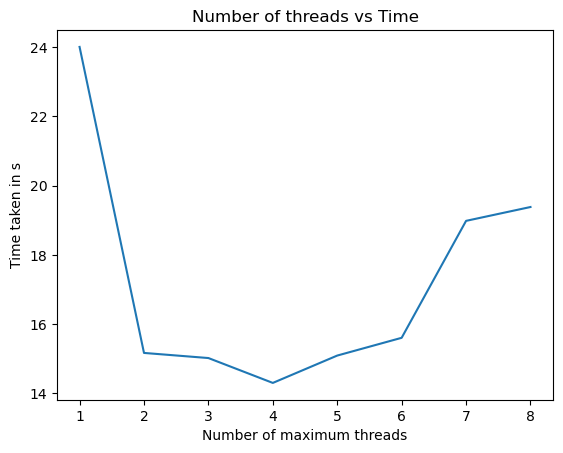

In [57]:
plt.plot(x_pts, y_pts)
plt.xlabel("Number of maximum threads")
plt.ylabel("Time taken in s")
plt.title("Number of threads vs Time")